# Import all libraries and dependencies:



In [21]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import pandas as pd
import math
import datetime
import platform

print('python version: ',platform.python_version())
print('Tensorflow version: ',tf.__version__)
print('Keras version: ',tf.keras.__version__)

python version:  3.7.6
Tensorflow version:  2.9.1
Keras version:  2.9.0


# Configuring Tensorboard

we will use Tensorboard to debug the model later

In [22]:
# Load the tensorboard notebook extension
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


# Load the data

The training data consists of 60000 28x28 px images of handwrittrnn digits from 0 to 9.
The test data consists of 10000 28x28 px images

In [23]:
mnist_dataset = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) =  mnist_dataset.load_data()

In [24]:
print('x_train: ',x_train.shape)
print('y_train: ',y_train.shape)
print('x_test: ',x_test.shape)
print('y_test: ', y_test.shape)

x_train:  (60000, 28, 28)
y_train:  (60000,)
x_test:  (10000, 28, 28)
y_test:  (10000,)


In [25]:
(_,IMAGE_WIDTH, IMAGE_HEIGHT) = x_train.shape
IMAGE_CHANNELS = 1

print('IMAGE_WIDTH: ',IMAGE_WIDTH);
print('IMAGE_HEIGHT: ',IMAGE_HEIGHT);
print('IMAGE_CHANNELS: ',IMAGE_CHANNELS);

IMAGE_WIDTH:  28
IMAGE_HEIGHT:  28
IMAGE_CHANNELS:  1


# Explore the data

Here is how each image in the dataset look like. It is 28x28 matrix of integers(from 0 to 255). Each integer represents a color of a pixel.

In [26]:
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,...,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,...,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,...,0,0,0,0,0,0,0,0,0,0


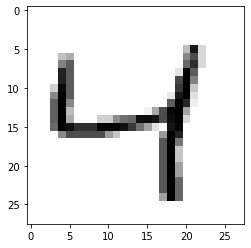

In [27]:
plt.imshow(x_train[2], cmap=plt.cm.binary)
plt.show()

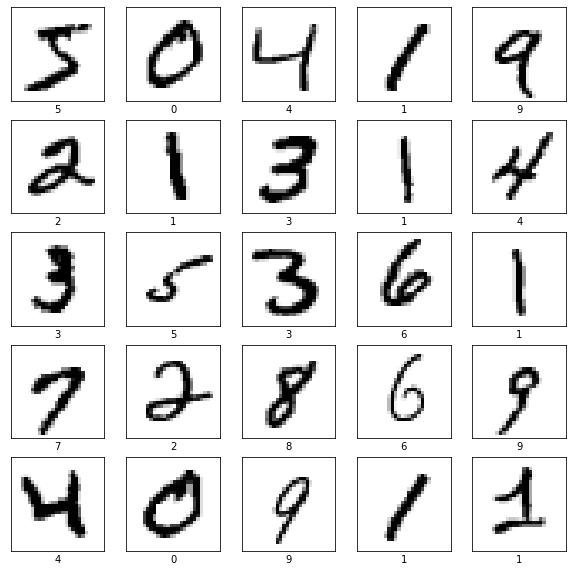

In [28]:
numbers_to_display = 25
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(10,10))
for i in range(numbers_to_display):
    plt.subplot(num_cells, num_cells,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

# Reshaping the data

In order to use the convolutional layers we need to reshape our data and add a color to the channel to it. As you have noticed currently every digit has a shape of (28,28) which means that it is a 28x28 matrix of color values from 0 to 255. We need to reshape it to (28,28,1), so that each pixel may have potentially multiple channels(like Red, Green and Blue).

In [29]:
x_train_with_channels = x_train.reshape(
    x_train.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

x_test_with_channels = x_test.reshape(
    x_test.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

In [30]:
print('x_train_with_channels: ',x_train_with_channels.shape)
print('x_test_with_channels: ',x_test_with_channels.shape)

x_train_with_channels:  (60000, 28, 28, 1)
x_test_with_channels:  (10000, 28, 28, 1)


# Normalize the data

Here we are just trying to move from values ranges of [0...255] to[0...1]

In [31]:
x_train_normalized = x_train_with_channels/255
x_test_normalized = x_test_with_channels/255

In [32]:
# Let's check just one row from the 0th image to see color channel values after normalization
x_train_normalized[0][18]

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.18039216],
       [0.50980392],
       [0.71764706],
       [0.99215686],
       [0.99215686],
       [0.81176471],
       [0.00784314],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ]])

# Build the model



In [63]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Convolution2D(
    input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS),
    kernel_size=5,
    filters=8,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(tf.keras.layers.Convolution2D(
    kernel_size=5,
    filters=16,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu
));

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(
    units=10,
    activation=tf.keras.activations.softmax,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

In [64]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 24, 24, 8)         208       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 12, 12, 8)        0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 16)          3216      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [66]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


# Compile the model

In [69]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=adam_optimizer,
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

In [70]:
log_dir=".logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

training_history = model.fit(
    x_train_normalized,
    y_train,
    epochs=10,
    validation_data=(x_test_normalized, y_test),
    callbacks=[tensorboard_callback]
)

Epoch 1/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0668 - accuracy: 0.9841 - val_loss: 0.0726 - val_accuracy: 0.9842
Epoch 2/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0432 - accuracy: 0.9877 - val_loss: 0.0724 - val_accuracy: 0.9862
Epoch 3/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0384 - accuracy: 0.9894 - val_loss: 0.0705 - val_accuracy: 0.9861
Epoch 4/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0310 - accuracy: 0.9910 - val_loss: 0.0705 - val_accuracy: 0.9861
Epoch 5/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0282 - accuracy: 0.9914 - val_loss: 0.0719 - val_accuracy: 0.9871
Epoch 6/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0247 - accuracy: 0.9923 - val_loss: 0.0727 - val_accuracy: 0.9872
Epoch 7/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0246 - accuracy: 0.9923 - val_loss: 0.0774 - val_a

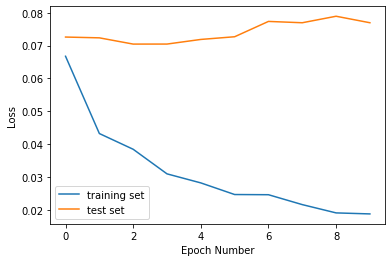

In [71]:
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(training_history.history['loss'], label='training set')
plt.plot(training_history.history['val_loss'], label='test set')
plt.legend()

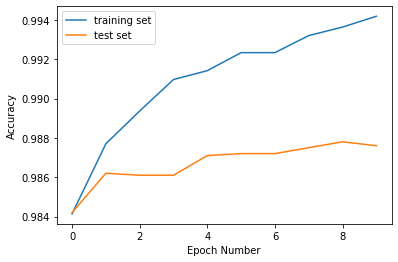

In [72]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'],label='training set')
plt.plot(training_history.history['val_accuracy'],label='test set')
plt.legend()

# Evaluate model accuracy

we need to compare the accuracy of our model on training set and on test set. We expect our model to perform similarly on both sets. If the performance on a test set will be poor comparing to a training set,it would be indicator for us that the model is overfitted and we have a "high variance" issue.

# Training set accuracy

In [73]:
%%capture
train_loss, train_accuracy = model.evaluate(x_train_normalized,y_train)

In [74]:
print('Training loss: ',train_loss)
print('Training accuracy: ',train_accuracy)

Training loss:  0.008335430175065994
Training accuracy:  0.9973999857902527


# Test set accuracy

In [75]:
%%capture
validation_loss, validation_accuracy = model.evaluate(x_test_normalized,y_test)

In [76]:
print('Validation loss: ',validation_loss)
print('Validation accuracy: ',validation_accuracy)

Validation loss:  0.07695959508419037
Validation accuracy:  0.9876000285148621


# Save the model

In [77]:
model_name = 'digits_recognition_cnn.h5'
model.save(model_name,save_format='h5')

In [78]:
loaded_model = tf.keras.models.load_model(model_name)

# Use the model (do predictions)

To use the model that we have just trained for digits recognition we need to call predict() method.

In [79]:
Predictions_one_hot = loaded_model.predict([x_test_normalized])

313/313 [==============================] - 1s 3ms/step


In [80]:
print('Predictions_one_hot: ',Predictions_one_hot.shape)

Predictions_one_hot:  (10000, 10)


In [81]:
# predictions in the form of one hot vectors(array of probabilities)
pd.DataFrame(Predictions_one_hot)

,0,1,2,3,4,5,6,7,8,9
0,1.076316e-36,4.703433e-18,3.198969e-11,1.322140e-21,2.249075e-17,6.126618e-34,0.000000e+00,1.000000e+00,4.124678e-31,1.603004e-12
1,8.775918e-32,3.962207e-21,1.000000e+00,7.589075e-24,1.942974e-28,0.000000e+00,2.205801e-32,7.222332e-20,3.096434e-26,6.235116e-36
2,2.220148e-36,1.000000e+00,6.261586e-32,0.000000e+00,7.094388e-24,0.000000e+00,1.238593e-33,1.319547e-18,3.098604e-21,5.478510e-36
3,1.000000e+00,6.381617e-20,1.828653e-17,2.888649e-19,5.341430e-26,4.173214e-14,2.562214e-08,4.840367e-18,5.922907e-12,2.211453e-11
4,1.046575e-32,4.732798e-21,1.387024e-29,0.000000e+00,9.999999e-01,1.368048e-30,3.392605e-33,4.603514e-17,4.694106e-20,1.281206e-07
...,...,...,...,...,...,...,...,...,...,...
9995,0.000000e+00,3.170058e-33,1.000000e+00,4.417260e-37,0.000000e+00,0.000000e+00,0.000000e+00,7.753801e-23,0.000000e+00,0.000000e+00
9996,0.000000e+00,1.014394e-35,5.095684e-25,1.000000e+00,0.000000e+00,3.141795e-15,0.000000e+00,4.784632e-33,4.118788e-28,0.000000e+00
9997,0.000000e+00,6.706032e-30,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,6.893087e-30,1.554137e-33,8.601510e-18
9998,0.000000e+00,0.000000e+00,0.000000e+00,1.738106e-21,0.000000e+00,1.000000e+00,2.871773e-34,0.000000e+00,1.641975e-36,0.000000e+00


In [82]:
# Let's extract predictions with highest probabilities and detect them
predictions = np.argmax(Predictions_one_hot, axis=1)
pd.DataFrame(predictions)

,0
0,7
1,2
2,1
3,0
4,4
...,...
9995,2
9996,3
9997,4
9998,5


In [83]:
print(predictions[0])

7


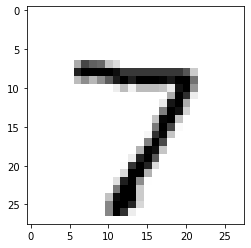

In [84]:
plt.imshow(x_test_normalized[0].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=plt.cm.binary)
plt.show()

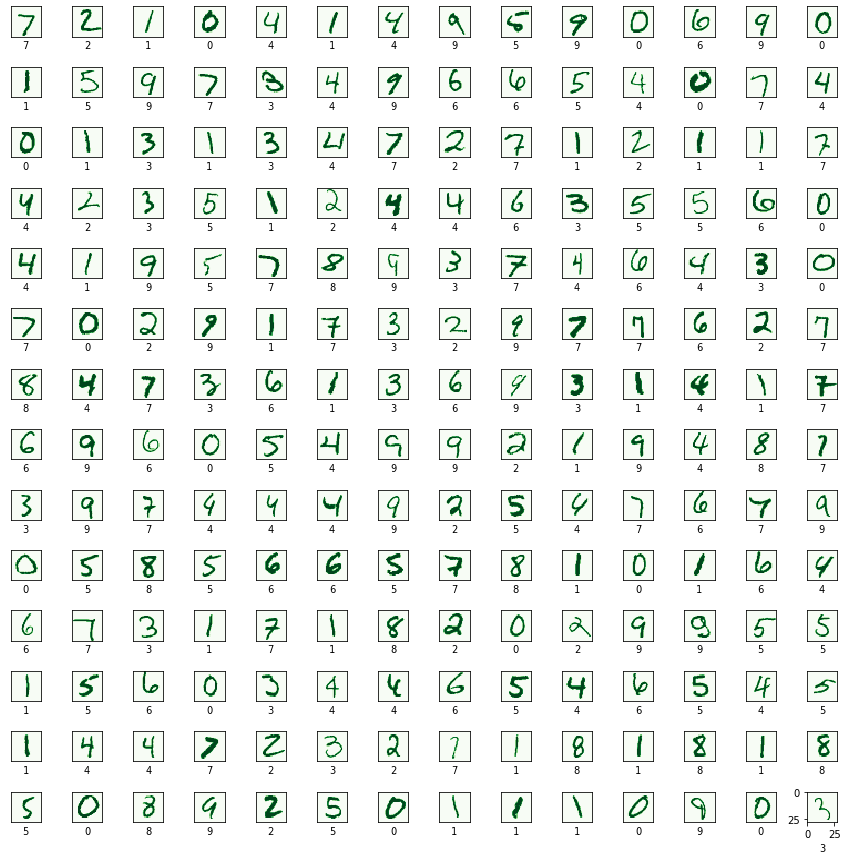

In [85]:
numbers_to_display = 196
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(15,15))
for plot_index in range(numbers_to_display):
    predicted_label = predictions[plot_index]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    color_map = 'Greens' if predicted_label == y_test[plot_index] else 'Reds'
    plt.subplot(num_cells, num_cells, plot_index+1)
    plt.imshow(x_test_normalized[plot_index].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), color_map)
    plt.xlabel(predicted_label)

plt.subplots_adjust(hspace=1,wspace=0.5)
plt.show()

# Plotting a confusion matrix

Confusion matrix shows what numbers are recognized well by the model and what numbers the model usually confuses to recognize correctly.

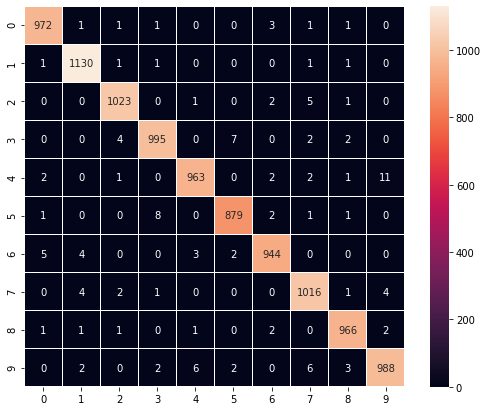

In [89]:
confusion_matrix = tf.math.confusion_matrix(y_test, predictions)
f, ax = plt.subplots(figsize=(9, 7))
sn.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.5,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()